<a href="https://colab.research.google.com/github/mariaeco/ICD_project_Maria/blob/main/ProjetoICD_Maria_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AGRUPAMENTOS K-means**

In [114]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Vou trabalhar com o banco de dados reduzido, para facilitar o aprendizado.
Usarei:
- Cor/Raça
- Tipo de Escola
- Número de pessoas na casa
- Renda (em categorias)
- As Notas do Enem

In [201]:
dfEnem = pd.read_csv('https://raw.githubusercontent.com/mariaeco/ICD_project_Maria/main/DADOS/MicroDadosEnemSelected.csv', sep="\t", encoding='ISO-8859-1' )
dfEnem = dfEnem[["TP_COR_RACA","TP_ESCOLA","TP_DEPENDENCIA_ADM_ESC","Q005","Q006","NU_NOTA_CN",'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NOTA_MEDIA']]
dfEnem

,TP_COR_RACA,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,Q005,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MEDIA
0,3,1,NaN,1,Q,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,4,B,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,NaN,4,E,620.7,654.7,607.4,831.4,920.0,726.84
3,3,1,NaN,4,C,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,NaN,4,B,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
147775,3,1,NaN,4,B,355.7,346.4,392.9,477.9,340.0,382.58
147776,1,1,NaN,3,C,442.4,522.0,522.0,456.3,460.0,480.54
147777,1,2,NaN,3,B,397.5,412.0,366.8,402.4,580.0,431.74
147778,3,1,NaN,3,E,540.2,542.7,611.7,644.6,720.0,611.84


### Em geral, os NaN nos dados das Notas são os candidatos que faltaram a prova. 
### O K-means não trabalha com NAs

Abaixo removo todos os alunos faltantes

In [202]:
df = dfEnem[dfEnem['NOTA_MEDIA'].notna()]
df = df[df['NU_NOTA_CN'].notna()]
df = df[df['NU_NOTA_CH'].notna()]
df = df[df['NU_NOTA_LC'].notna()]
df = df[df['NU_NOTA_MT'].notna()]
df = df[df['NU_NOTA_REDACAO'].notna()]

# transformando dados q são inteiros para categoricos
df['TP_ESCOLA'].replace({1: 'NI',2:'Publica',3:'Privada'}, inplace=True)
df['TP_COR_RACA'].replace({0:'NI',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indigena'}, inplace=True)
df['TP_DEPENDENCIA_ADM_ESC'].replace({1.0: 'Federal',2.0:'Estadual',3.0:'Municipal',4.0:'Privada'}, inplace=True)

In [203]:
# Preciso retirar os NI da variavel TP_ESCOLA (CONFORME A EXPLICAÇÃO NA ATIVIDADE DE LIMPEZA DE DADOS)
for i in df['TP_DEPENDENCIA_ADM_ESC']:
    if (i=='Estadual') or (i=='Federal') or (i=='Municipal') :
      df['TP_ESCOLA'].replace({'NI':'Publica'}, inplace=True)
    if (i=='Privada'):
      df['TP_ESCOLA'].replace({'NI':'Privada'}, inplace=True)

In [204]:

# são muitas categorias de renda (A-Q), então vou re-agrupar em 3: MUITO baixa (A-C), BAIXA (D-G), MEDIA (H-L), e ALTA(M-Q) # separação não criteriosa, aleatoria
for i in df['Q006']:
    if (i=='A') or (i=='B') or (i=='C') :
       df['Q006'].replace({'A':'Muito Baixa','B':'Muito Baixa','C':'Muito Baixa'},inplace=True)
    if (i=='D') or (i=='E') or (i=='F') or (i=='G') :
       df['Q006'].replace({'D':'','E':'Baixa','F':'Baixa','G':'Baixa'},inplace=True)
    if (i=='H') or (i=='I') or (i=='J') or (i=='K') or (i=='L') :
       df['Q006'].replace({'H':'Media','I':'Media','J':'Media','K':'Media','L':'Media'},inplace=True)
    if (i=='M') or (i=='N') or (i=='O') or (i=='P') or (i=='Q') :
       df['Q006'].replace({'M':'Alta','N':'Alta','O':'Alta','P':'Alta', 'Q':'Alta'},inplace=True)
df

,TP_COR_RACA,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,Q005,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MEDIA
2,Parda,Publica,NaN,4,Baixa,620.7,654.7,607.4,831.4,920.0,726.84
7,Parda,Publica,NaN,5,Muito Baixa,485.6,547.5,487.1,461.4,620.0,520.32
8,NI,Publica,NaN,1,Muito Baixa,681.1,686.7,610.8,808.9,640.0,685.50
9,Parda,Publica,NaN,6,Muito Baixa,438.6,491.2,548.2,468.9,760.0,541.38
11,Parda,Publica,NaN,3,Muito Baixa,389.8,519.6,558.3,502.3,840.0,562.00
...,...,...,...,...,...,...,...,...,...,...,...
147774,Parda,Publica,NaN,3,Muito Baixa,507.3,540.2,554.8,582.2,600.0,556.90
147775,Parda,Publica,NaN,4,Muito Baixa,355.7,346.4,392.9,477.9,340.0,382.58
147776,Branca,Publica,NaN,3,Muito Baixa,442.4,522.0,522.0,456.3,460.0,480.54
147777,Branca,Publica,NaN,3,Muito Baixa,397.5,412.0,366.8,402.4,580.0,431.74


#Conforme a aula

Escolho 2 variáveis para ver se há um agrupamento

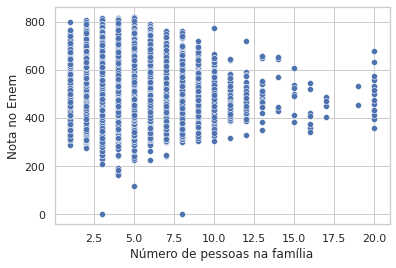

In [205]:
g = sns.scatterplot(data=df, x="Q005", y="NOTA_MEDIA")
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");

In [206]:
df1 = df[["Q005","NOTA_MEDIA"]]

In [207]:
kmeans = KMeans(n_clusters=2, n_init=10,
   ...:     max_iter=300,
   ...:     random_state=42)

In [208]:
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [209]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 1], dtype=int32)

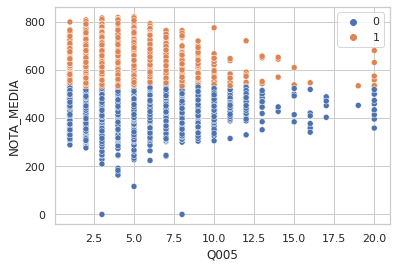

In [210]:
sns.scatterplot(data=df, x="Q005", y="NOTA_MEDIA", hue=kmeans.labels_)

**Observando o resultado do k-means, várias perguntas são levantadas:**

1) Qual a quantidade de grupos que devo escolher? Como sei qual é a melhor quantidade?

2) Como eu sei o significado desses grupo? *Comparando o resultado com o banco de dados*. Mas, como o banco de dados é enorme, preciso de um demostração visual disso.


***Lendo sobre o k-means***, aprendi que é um algorítmo de agrupamento não supervisionado, vai agrupar em torno das médias e posso usar variáveis com unidades diferenciadas, por exemplo, as notas no Enem, cor, renda, e etc, contanto que os dados sejam contínuos. No meu caso, por enquanto, irei trabalhar com apenas 1 tipo de variável contínua, que serão as variáveis das notas.

# Escolho as variáveis contínuas para serem agrupadas por enquanto,para facilitar, serão as variáveis nota media e n de pessoas em casa

In [213]:
group_df = df[["TP_COR_RACA","TP_ESCOLA","Q006",'NOTA_MEDIA','Q005']]

Vemos os pairplots abaixo, mas não conseguimos ver bem as classificações

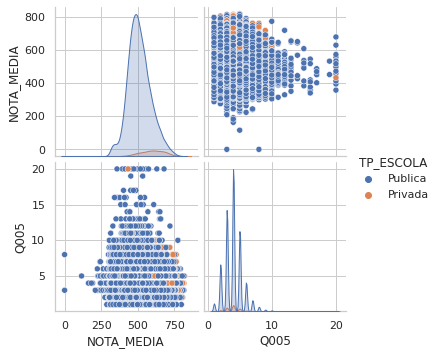

In [214]:
sns.pairplot(group_df, hue='TP_ESCOLA')

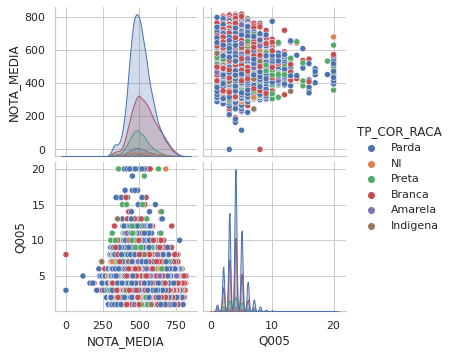

In [215]:
sns.pairplot(group_df, hue='TP_COR_RACA')

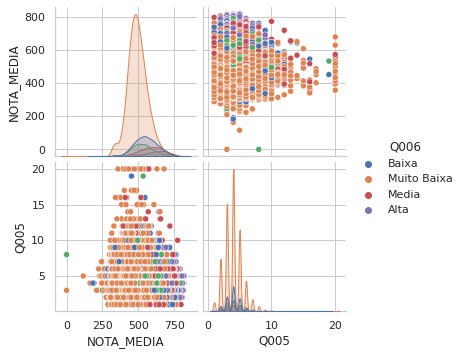

In [216]:
sns.pairplot(group_df, hue='Q006')

## **Vendo o melhor K**

In [218]:
var_df = df[['NOTA_MEDIA','Q005']]

In [219]:
wcss = []
for i in range(1,10): # 1 a 20k
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10)
  kmeans.fit(var_df)
  wcss.append(kmeans.inertia_)

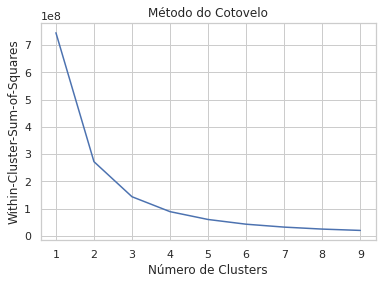

In [221]:
sns.set(style='whitegrid',font_scale=1,color_codes=True);

plt.plot(range(1, 10), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

Podemos separar em vários grupos, pois o wcss não chega no zero, logo as diferenças entre as médias das notas do enem são distribuídas em inúmeros grupos.

Por enquanto, vou escolher 5 grupos, para facilitar as análise e aprender a metodologia.

In [222]:
kmeans = KMeans(n_clusters=5, n_init=10,
   ...:     max_iter=300,
   ...:     random_state=42)

In [223]:
kmeans.fit(var_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [224]:
kmeans.labels_

array([1, 4, 1, ..., 0, 0, 2], dtype=int32)

In [226]:
group_df['Kclasses']=kmeans.labels_
group_df 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TP_COR_RACA,TP_ESCOLA,Q006,NOTA_MEDIA,Q005,Kclasses
2,Parda,Publica,Baixa,726.84,4,1
7,Parda,Publica,Muito Baixa,520.32,5,4
8,NI,Publica,Muito Baixa,685.50,1,1
9,Parda,Publica,Muito Baixa,541.38,6,4
11,Parda,Publica,Muito Baixa,562.00,3,2
...,...,...,...,...,...,...
147774,Parda,Publica,Muito Baixa,556.90,3,2
147775,Parda,Publica,Muito Baixa,382.58,4,3
147776,Branca,Publica,Muito Baixa,480.54,3,0
147777,Branca,Publica,Muito Baixa,431.74,3,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 v

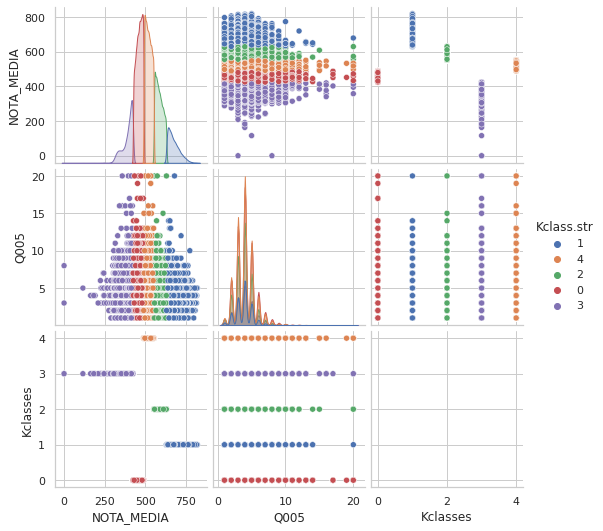

In [232]:
group_df['Kclass.str'] = group_df['Kclasses'].apply(str)
sns.pairplot(group_df, hue=str('Kclass.str'))

Text(0.5, 0, 'Nota no Enem')

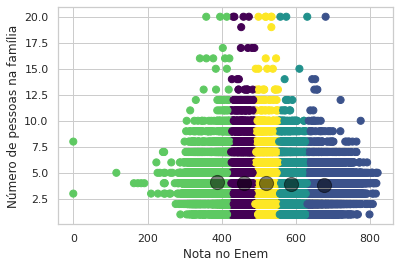

In [244]:
from sklearn.datasets.samples_generator import make_blobs

y_kmeans = kmeans.predict(var_df)

plt.scatter(group_df['NOTA_MEDIA'],group_df['Q005'], c=y_kmeans, s=50, cmap='viridis') #cmap='viridis' são as cores

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='black', s=200, alpha=0.5);


plt.ylabel("Número de pessoas na família")
plt.xlabel("Nota no Enem")

Há um padrão nas notas, mas ainda não consigo extrair o que cada grupo é. Creio que seha uma mistura de da renda e tipo de escola, talvez a renda tenha um papel maior na diferenciação.